In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression


In [ ]:
# Loading data using relative path
df = pd.read_csv("/content/Mice_protein_expression_dataset.xls - Hoja1.csv")
print("Initial dataset shape:", df.shape)
df.head()

Initial dataset shape: (1080, 82)


,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,...,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,...,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,...,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine,C/S,c-CS-m


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MouseID          1080 non-null   object 
 1   DYRK1A_N         1077 non-null   float64
 2   ITSN1_N          1077 non-null   float64
 3   BDNF_N           1077 non-null   float64
 4   NR1_N            1077 non-null   float64
 5   NR2A_N           1077 non-null   float64
 6   pAKT_N           1077 non-null   float64
 7   pBRAF_N          1077 non-null   float64
 8   pCAMKII_N        1077 non-null   float64
 9   pCREB_N          1077 non-null   float64
 10  pELK_N           1077 non-null   float64
 11  pERK_N           1077 non-null   float64
 12  pJNK_N           1077 non-null   float64
 13  PKCA_N           1077 non-null   float64
 14  pMEK_N           1077 non-null   float64
 15  pNR1_N           1077 non-null   float64
 16  pNR2A_N          1077 non-null   float64
 17  pNR2B_N       

In [ ]:
df.nunique()

,0
MouseID,1080
DYRK1A_N,1077
ITSN1_N,1076
BDNF_N,1077
NR1_N,1077
NR2A_N,1077
pAKT_N,1076
pBRAF_N,1075
pCAMKII_N,1077
pCREB_N,1077


In [ ]:
# For all rows (features) in the output
print("\nChecking for missing values:")
pd.set_option('display.max_rows', None)
print(df.isnull().sum())



Checking for missing values:
MouseID              0
DYRK1A_N             3
ITSN1_N              3
BDNF_N               3
NR1_N                3
NR2A_N               3
pAKT_N               3
pBRAF_N              3
pCAMKII_N            3
pCREB_N              3
pELK_N               3
pERK_N               3
pJNK_N               3
PKCA_N               3
pMEK_N               3
pNR1_N               3
pNR2A_N              3
pNR2B_N              3
pPKCAB_N             3
pRSK_N               3
AKT_N                3
BRAF_N               3
CAMKII_N             3
CREB_N               3
ELK_N               18
ERK_N                3
GSK3B_N              3
JNK_N                3
MEK_N                7
TRKA_N               3
RSK_N                3
APP_N                3
Bcatenin_N          18
SOD1_N               3
MTOR_N               3
P38_N                3
pMTOR_N              3
DSCR1_N              3
AMPKA_N              3
NR2B_N               3
pNUMB_N              3
RAPTOR_N             3
TIAM

In [ ]:
# Dropping rows with missing values in DYRK1A_N
print("\nShape before dropping DYRK1A_N nulls:", df.shape)
df = df.dropna(subset=['DYRK1A_N'])
print("Shape after dropping DYRK1A_N nulls:", df.shape)


Shape before dropping DYRK1A_N nulls: (1080, 82)
Shape after dropping DYRK1A_N nulls: (1077, 82)


In [ ]:
# Identifing features with missing values
null_features = df.columns[df.isnull().sum() > 0]
print("\nFeatures with missing values:", null_features.tolist())


Features with missing values: ['ELK_N', 'MEK_N', 'Bcatenin_N', 'BAD_N', 'BCL2_N', 'pCFOS_N', 'H3AcK18_N', 'EGR1_N', 'H3MeK4_N']


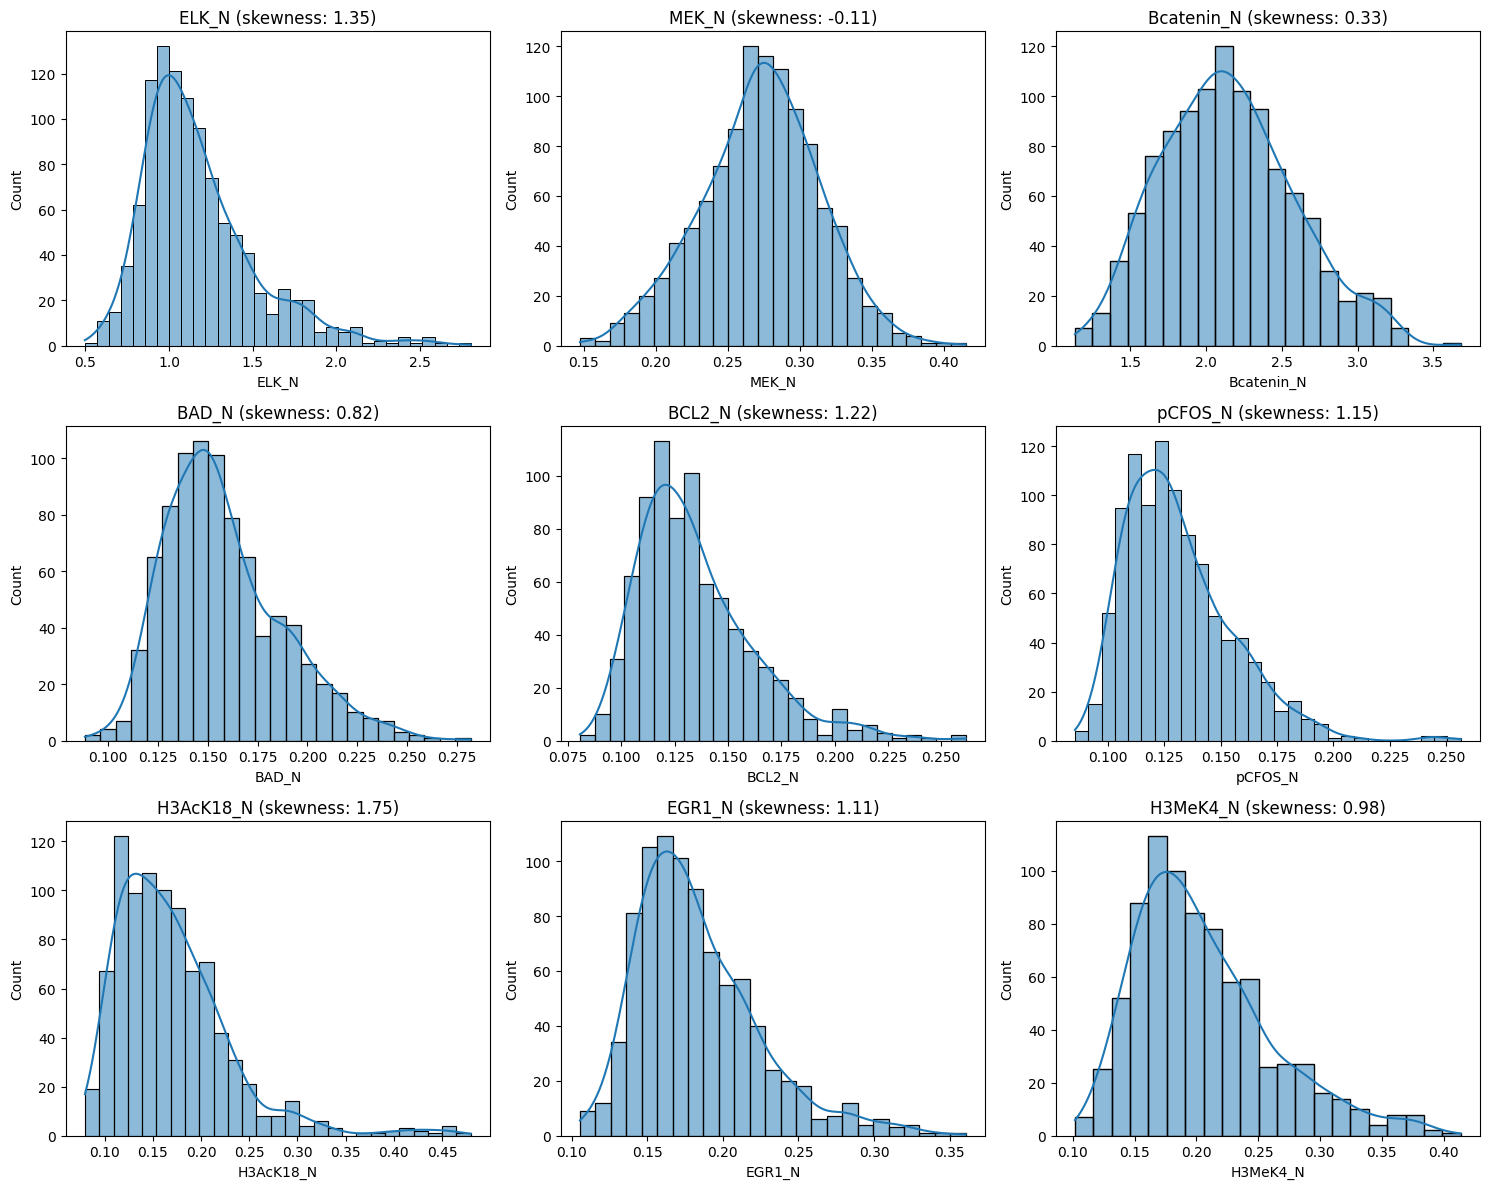

In [ ]:
n = len(null_features)
n_cols = 3
n_rows = (n + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*5, n_rows*4))
axes = axes.flatten()

for i, col in enumerate(null_features):
    sns.histplot(df[col], kde=True, ax=axes[i])
    skew_value = df[col].skew()
    axes[i].set_title(f"{col} (skewness: {skew_value:.2f})")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [ ]:
mean_features = ['MEK_N', 'Bcatenin_N']
median_features = ['ELK_N', 'BAD_N', 'BCL2_N', 'pCFOS_N', 'H3AcK18_N', 'EGR1_N', 'H3MeK4_N']

# Filling MEK_N and Bcatenin_N with mean
for col in mean_features:
    df[col] = df[col].fillna(df[col].mean())

# Filling the other features with median
for col in median_features:
    df[col] = df[col].fillna(df[col].median())


In [ ]:
# Verifing no missing values remain
assert df.isnull().sum().sum() == 0, "There are still missing values in the dataset"
print("\nMissing values check passed!")


Missing values check passed!


In [ ]:
# Dropping unnecessary column
df.drop(columns=["MouseID"], inplace=True)
print("Dataset Shape: ",df.shape)


Dataset Shape:  (1077, 81)


In [ ]:
# Checking for duplicates
num_dupes = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {num_dupes}")


Number of duplicate rows: 0


In [ ]:
# Identifing categorical and numerical columns
cat_cols =df.select_dtypes(include=["object"]).columns.tolist()
num_cols =df.select_dtypes(include=np.number).columns.tolist()
print("Catagorical Features:")
print(cat_cols)
print("Numerical Features:")
print(num_cols)

Catagorical Features:
['Genotype', 'Treatment', 'Behavior', 'class']
Numerical Features:
['DYRK1A_N', 'ITSN1_N', 'BDNF_N', 'NR1_N', 'NR2A_N', 'pAKT_N', 'pBRAF_N', 'pCAMKII_N', 'pCREB_N', 'pELK_N', 'pERK_N', 'pJNK_N', 'PKCA_N', 'pMEK_N', 'pNR1_N', 'pNR2A_N', 'pNR2B_N', 'pPKCAB_N', 'pRSK_N', 'AKT_N', 'BRAF_N', 'CAMKII_N', 'CREB_N', 'ELK_N', 'ERK_N', 'GSK3B_N', 'JNK_N', 'MEK_N', 'TRKA_N', 'RSK_N', 'APP_N', 'Bcatenin_N', 'SOD1_N', 'MTOR_N', 'P38_N', 'pMTOR_N', 'DSCR1_N', 'AMPKA_N', 'NR2B_N', 'pNUMB_N', 'RAPTOR_N', 'TIAM1_N', 'pP70S6_N', 'NUMB_N', 'P70S6_N', 'pGSK3B_N', 'pPKCG_N', 'CDK5_N', 'S6_N', 'ADARB1_N', 'AcetylH3K9_N', 'RRP1_N', 'BAX_N', 'ARC_N', 'ERBB4_N', 'nNOS_N', 'Tau_N', 'GFAP_N', 'GluR3_N', 'GluR4_N', 'IL1B_N', 'P3525_N', 'pCASP9_N', 'PSD95_N', 'SNCA_N', 'Ubiquitin_N', 'pGSK3B_Tyr216_N', 'SHH_N', 'BAD_N', 'BCL2_N', 'pS6_N', 'pCFOS_N', 'SYP_N', 'H3AcK18_N', 'EGR1_N', 'H3MeK4_N', 'CaNA_N']


In [ ]:
# converting catagorical variable to numerical
df = pd.get_dummies(df,columns=['Genotype', 'Treatment', 'Behavior'],dtype=int)


In [ ]:
df.head()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,EGR1_N,H3MeK4_N,CaNA_N,class,Genotype_Control,Genotype_Ts65Dn,Treatment_Memantine,Treatment_Saline,Behavior_C/S,Behavior_S/C
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,0.131790,0.128186,1.675652,c-CS-m,1,0,1,0,1,0
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,0.135103,0.131119,1.743610,c-CS-m,1,0,1,0,1,0
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,0.133362,0.127431,1.926427,c-CS-m,1,0,1,0,1,0
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,0.147444,0.146901,1.700563,c-CS-m,1,0,1,0,1,0
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,0.140314,0.148380,1.839730,c-CS-m,1,0,1,0,1,0


In [ ]:
# Counting the number of instances per class
class_counts = df['class'].value_counts()

# Checking if the dataset is imbalanced
print("Class counts:",class_counts)

Class counts: class
c-CS-m    150
c-SC-m    150
c-CS-s    135
c-SC-s    135
t-CS-m    135
t-SC-m    135
t-SC-s    132
t-CS-s    105
Name: count, dtype: int64


<ipython-input-60-f425bc93d6f4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')


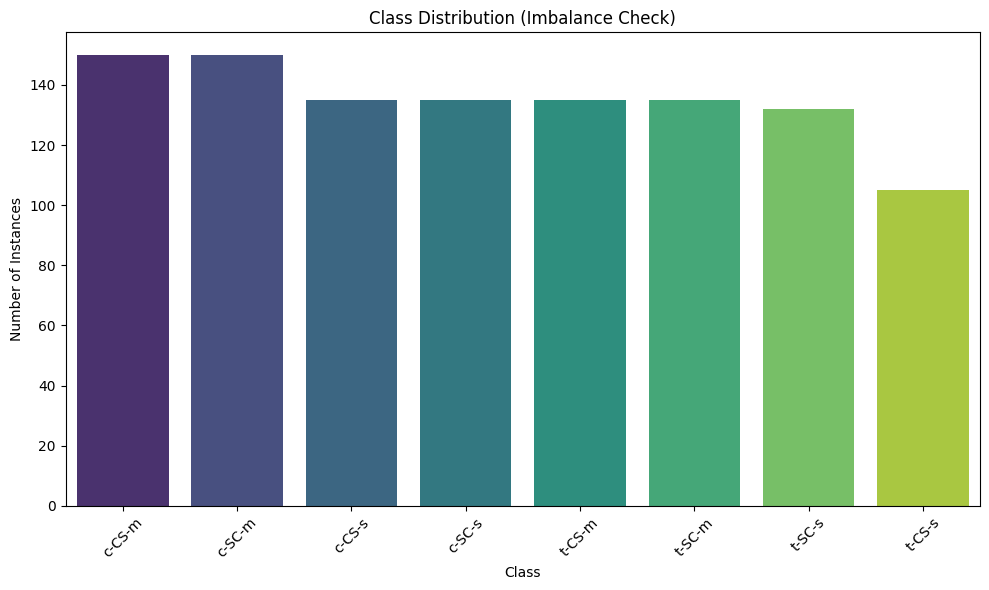

In [ ]:
# Analyzing class distribution
plt.figure(figsize=(10,6))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
plt.xlabel('Class')
plt.ylabel('Number of Instances')
plt.title('Class Distribution (Imbalance Check)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

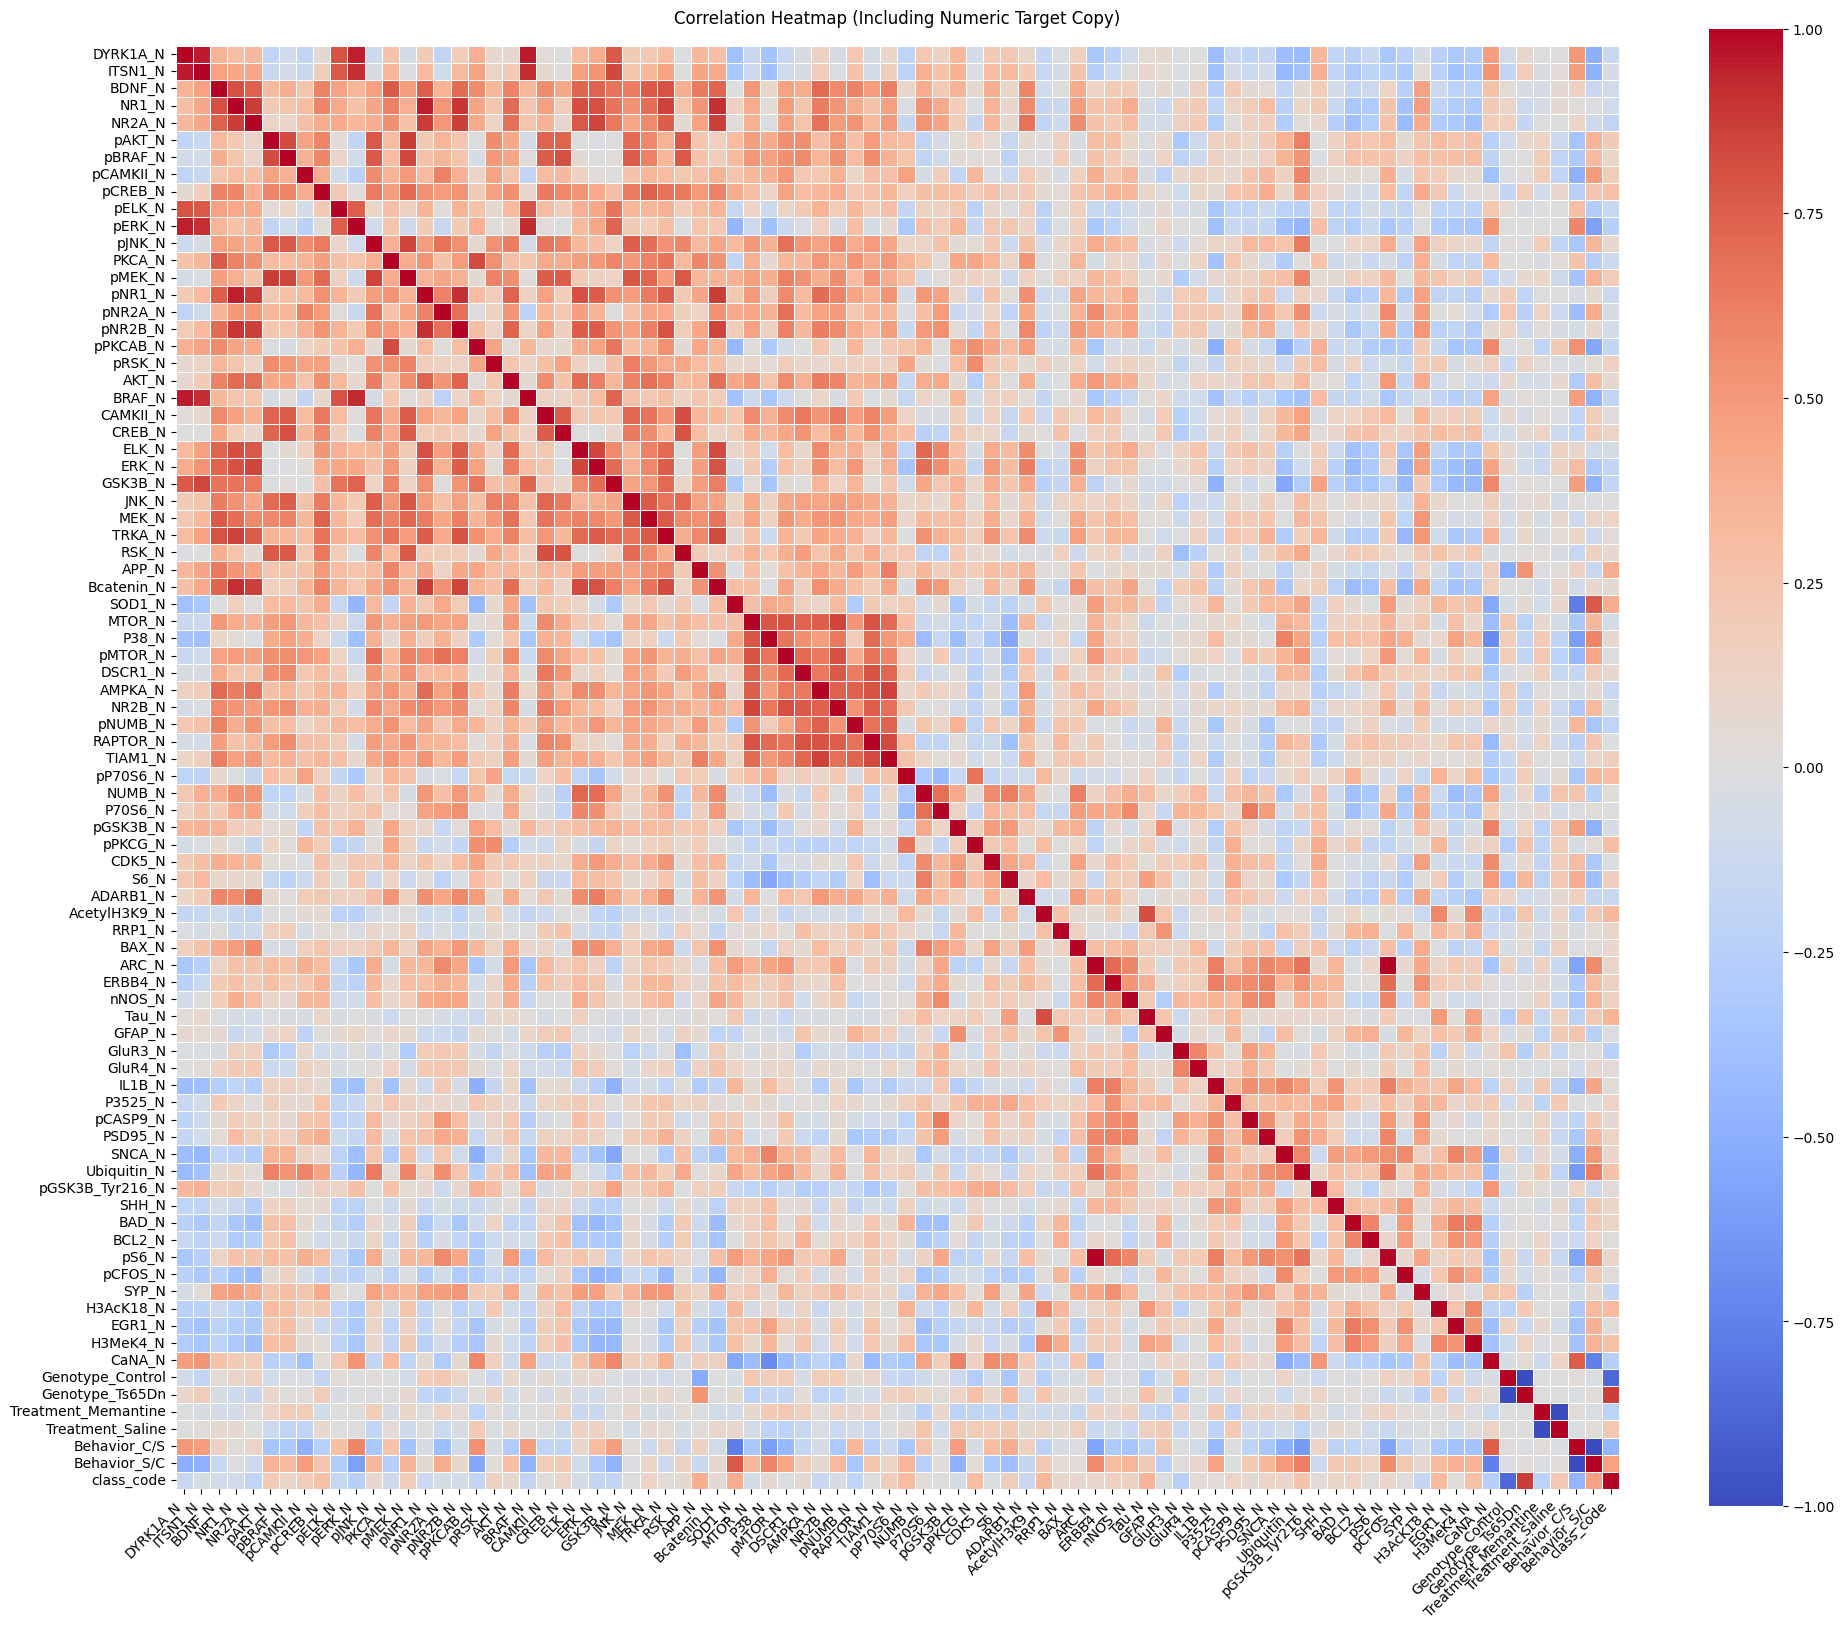

In [ ]:
df['class_code'] = LabelEncoder().fit_transform(df['class'])

numeric_df = df.select_dtypes(include=['number', 'int', 'float'])
corr_matrix = numeric_df.corr()

plt.figure(figsize=(20,20))
sns.heatmap(
    corr_matrix,
    cmap='coolwarm',
    center=0,
    annot=False,
    fmt='.2f',
    linewidths=0.4,
    square=True,
    cbar_kws={"shrink": .75}
)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.title("Correlation Heatmap (Including Numeric Target Copy)", pad=16)
plt.tight_layout()
plt.show()




In [ ]:
df.drop(columns=["class_code"], inplace=True)
print("Dataset Shape: ",df.shape)

Dataset Shape:  (1077, 84)


In [ ]:
# Prepare data for modeling
le = LabelEncoder()
x = df.drop('class', axis=1)
y = le.fit_transform(df['class'])

# Spliting data
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.30,stratify=y,random_state=42)
print("Train shape:", x_train.shape)
print("Test shape: ", x_test.shape)

Train shape: (753, 83)
Test shape:  (324, 83)


In [ ]:
# Scaling features
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled  = scaler.transform(x_test)

In [ ]:
# Keras NN model
num_classes = len(np.unique(y))
nn_model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(x_train_scaled.shape[1],)),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(num_classes, activation='softmax')
])
nn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
nn_model.fit(x_train_scaled, y_train, validation_data=(x_test_scaled, y_test), epochs=50, batch_size=32, verbose=0)
y_pred_nn = np.argmax(nn_model.predict(x_test_scaled), axis=1)

# Other models
models = {
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42)
}



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


In [ ]:
results = {}

for name, model in models.items():
    model.fit(x_train_scaled, y_train)
    y_pred = model.predict(x_test_scaled)
    results[name] = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred, average='weighted'),
        'recall': recall_score(y_test, y_pred, average='weighted'),
        'f1': f1_score(y_test, y_pred, average='weighted'),
        'confusion_matrix': confusion_matrix(y_test, y_pred),
        'y_pred': y_pred
    }

# Add NN results
results['Neural Network'] = {
    'accuracy': accuracy_score(y_test, y_pred_nn),
    'precision': precision_score(y_test, y_pred_nn, average='weighted'),
    'recall': recall_score(y_test, y_pred_nn, average='weighted'),
    'f1': f1_score(y_test, y_pred_nn, average='weighted'),
    'confusion_matrix': confusion_matrix(y_test, y_pred_nn),
    'y_pred': y_pred_nn
}


In [ ]:
for name in results.keys():
    results[name]['y_pred_str'] = le.inverse_transform(results[name]['y_pred'])
    print(f"{name} first 5 predicted string labels: {results[name]['y_pred_str'][:5]}")


KNN first 5 predicted string labels: ['t-SC-m' 'c-CS-m' 'c-SC-s' 't-CS-s' 't-SC-m']
Decision Tree first 5 predicted string labels: ['t-SC-m' 'c-CS-m' 'c-SC-s' 't-CS-s' 't-SC-m']
Logistic Regression first 5 predicted string labels: ['t-SC-m' 'c-CS-m' 'c-SC-s' 't-CS-s' 't-SC-m']
Neural Network first 5 predicted string labels: ['t-SC-m' 'c-CS-m' 'c-SC-s' 't-CS-s' 't-SC-m']


In [ ]:
# Printing model metrics
print("Model Metrics:")
for name, res in results.items():
    print(f"\n{name}:")
    print(f"Accuracy: {res['accuracy']:.3f}")
    print(f"Precision: {res['precision']:.3f}")
    print(f"Recall: {res['recall']:.3f}")
    print(f"F1 Score: {res['f1']:.3f}")

Model Metrics:

KNN:
Accuracy: 0.978
Precision: 0.979
Recall: 0.978
F1 Score: 0.978

Decision Tree:
Accuracy: 1.000
Precision: 1.000
Recall: 1.000
F1 Score: 1.000

Logistic Regression:
Accuracy: 1.000
Precision: 1.000
Recall: 1.000
F1 Score: 1.000

Neural Network:
Accuracy: 1.000
Precision: 1.000
Recall: 1.000
F1 Score: 1.000


<ipython-input-69-7815ebbeb6b8>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[i], x=list(results.keys()), y=scores, palette='viridis')
<ipython-input-69-7815ebbeb6b8>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[i], x=list(results.keys()), y=scores, palette='viridis')
<ipython-input-69-7815ebbeb6b8>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[i], x=list(results.keys()), y=scores, palette='viridis')
<ipython-input-69-7815ebbeb6b8>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated a

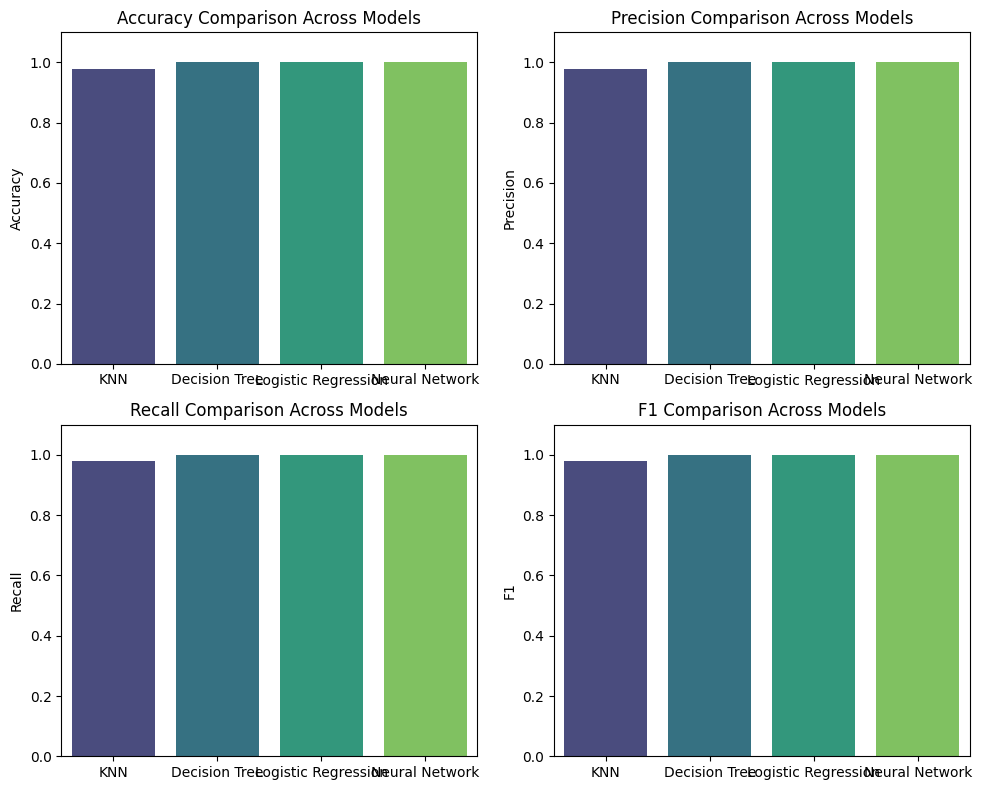

In [ ]:
# Bar chart comparison
metrics = ['accuracy', 'precision', 'recall', 'f1']
num_metrics = len(metrics)

fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.flatten()

for i, metric in enumerate(metrics):
    scores = [results[m][metric] for m in results.keys()]
    sns.barplot(ax=axes[i], x=list(results.keys()), y=scores, palette='viridis')
    axes[i].set_title(f'{metric.capitalize()} Comparison Across Models')
    axes[i].set_ylim(0, 1.1)
    axes[i].set_ylabel(metric.capitalize())

plt.tight_layout()
plt.show()


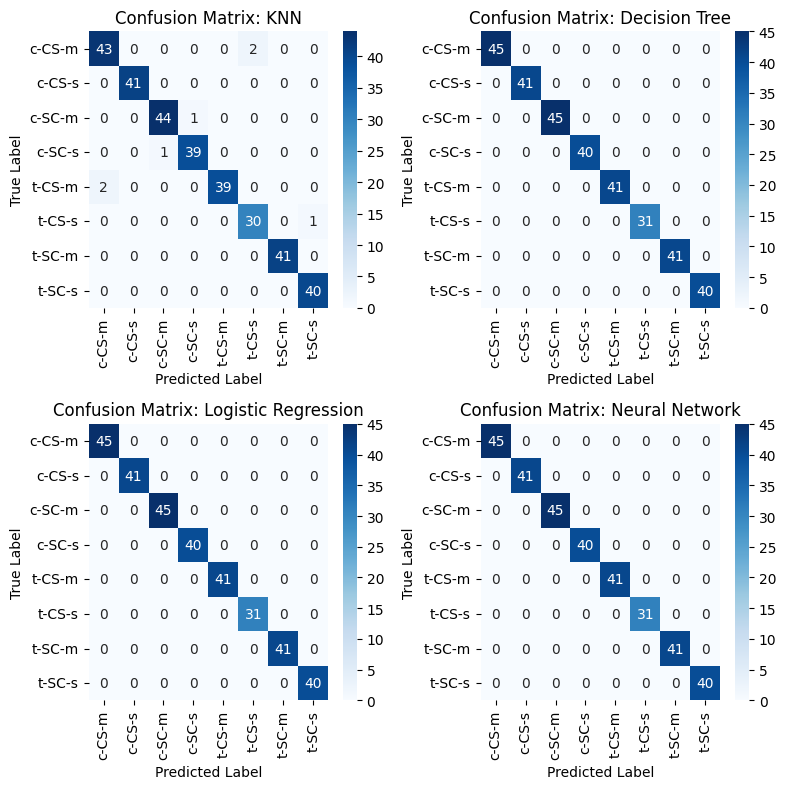

In [ ]:
# Confusion matrices comparison
model_names = list(results.keys())
num_models = len(model_names)

cols = 2
rows = (num_models + 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(8, 4 * rows))

if rows == 1:
    axes = axes.flatten()
else:
    axes = axes.flatten()

for i, name in enumerate(model_names):
    cm = results[name]['confusion_matrix']
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=le.classes_, yticklabels=le.classes_, ax=axes[i])
    axes[i].set_title(f'Confusion Matrix: {name}')
    axes[i].set_xlabel('Predicted Label')
    axes[i].set_ylabel('True Label')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()